## Creating a generative AI with twinlab

In [3]:
# Standard imports
import pathlib
import warnings

# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# twinlab imports
import twinlab as tl

Data preparation

In [4]:
# Seed
np.random.seed(123)

# Read data
# filepath = str(pathlib.Path(__file__).parent.resolve()) + "/tmp"
filepath = '/Users/michellebieger/Documents/digi/doggen/single_in_multi_out_sample/tmp'
df = pd.read_csv(filepath + "/data.csv")

Data campaign

In [5]:
# Set up campaign (without model selection)
setup_dict = {
    "inputs": list(df.columns[0]),
    "outputs": list(df.columns[1:]),
    'estimator': 'gaussian_process_regression',
    'decompose_outputs': False,
    'output_explained_variance': 0.9
}
campaign = tl.Campaign(**setup_dict)

# Run campaign
train_dict = {
    "df": df,
    "train_test_split": 150,
}
campaign.fit(**train_dict)

Output

In [6]:
print("Testing score: {}".format(campaign.score()))

# Create inference output plot and save in directory
def oscillator(x):
    return np.cos((x - 5) / 2) ** 2 * x * 2, -1 * np.cos((x - 5) / 2) ** 2 * x * 2

X = np.linspace(-10,10)[:,np.newaxis]
y = np.hstack(oscillator(X))

# sample n samples at each location along X
num_samples = 40
samples = campaign.sample(pd.DataFrame(X, columns=campaign.inputs), num_samples=num_samples)

# convert to numpy and reshape
samples = samples[campaign.outputs].values

Testing score: 2.9896077045321623


Plotting

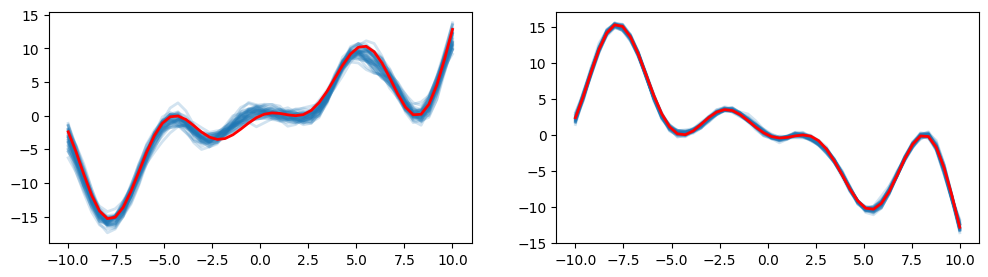

In [7]:
# Plot the samples
plt.figure(figsize=(12,3))
ax1 = plt.subplot(121)
ax1.plot(X.flatten(), samples[:, :num_samples], c='#1f77b4', linewidth=2, alpha=0.2)
ax1.plot(X, y[:, 0], c='r', linewidth=2)

ax2 = plt.subplot(122)
ax2.plot(X.flatten(), samples[:, num_samples:], c='#1f77b4', linewidth=2, alpha=0.2)
ax2.plot(X, y[:, 1], c='r', linewidth=2)

plt.savefig(filepath + "/output_gp.pdf", bbox_inches="tight")